# #ENDSARS Tweets Sentiment Analysis
The EndSARS movement, originated in 2017 and revitalized in 2020 is a campaign that started on twitter using the hashtag #ENDSARS to protest against police brutality in Nigeria alongside calls for the disbanding of the Special Anti-Robbery Squad (SARS). As at now, more than 28 million tweets bearing the hashtag #ENDSARS have been accumulated on twitter.

In this project, I will:
- Scrape tweets pertaining to the hashtag (with focus on Lagos and the month of October, 2020 when the protest actually happened) using the open-source twitter scraping tool, [TWINT](https://github.com/twintproject/twint)
- Perform EDA on the tweets
- Perform sentiment analysis on the tweets using Textblob library
- Check how has the sentiment changed over time?

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

maxTweets = 100

# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('from:ose4g1 since:2020-10-31 until:2020-12-31').get_items()):
    if i>maxTweets:
        break
    tweets_list2.append([tweet.date, tweet.content])

# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['date', 'content'])

# Display first 5 entries from dataframe
tweets_df2.head()

,date,content
0,2020-12-29 09:35:41+00:00,@usmahm @joinentre Congrats bro.🚀🚀\n\nReally h...
1,2020-12-28 13:20:59+00:00,@Geektutor Nothing wey @Geektutor no dey do.
2,2020-12-25 15:12:17+00:00,@Geektutor I've been trying to sign up unsucce...
3,2020-12-25 14:53:50+00:00,@_iteoluwa Swears
4,2020-12-25 07:40:55+00:00,@DaveyHert @blarrkwave_ @hackSultan @Samson_Go...


## Import Libraries

In [ ]:
import twint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# data preprocessing
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
pd.set_option('display.max_columns', 50)

import nest_asyncio
nest_asyncio.apply()

In [4]:
import twint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# data preprocessing
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
pd.set_option('display.max_columns', 50)

import nest_asyncio
nest_asyncio.apply()

### Connect to twitter and Load Tweets via Twint
uncomment to cell below to scrape the tweets

In [ ]:
# # scrape endsars tweets for the month of October, 2020 - when the demonstration was at its peak
# #configuration
# config = twint.Config()
# config.Since = '2020-10-03'
# config.Until = '2020-10-31'
# config.Search = "ENDSARS"
# config.Near = 'lagos'
# config.Lang = "en"
# config.Limit = 130000
# config.Pandas = True
# config.Hide_output = True

# config.Store_csv = True
# config.Output = "endsarsx.csv"

In [ ]:
# save the loaded tweets in a pandas dafarame and csv file
# tweet_data = twint.storage.panda.Tweets_df
# tweet_data.to_csv('endsars_20.csv', index=False)

In [ ]:
# load the datasets
tweet_data = pd.read_csv("endsars_20.csv")

# check first few rows
tweet_data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1322326751117254662,1322326751117254662,1.604102e+12,2020-10-31 00:57:19,100,NaN,Amen. #EndSARS #EndPoliceBrutalityinNigera,en,"['endsars', 'endpolicebrutalityinnigera']",[],471511569,471511569,chiefchika,chika agu,6,0,https://twitter.com/chiefchika/status/13223267...,[],[],0,NaN,False,0,0,0,https://twitter.com/ItefueJ/status/13220345059...,ENDSARS,lagos,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1322322632499515394,1322322626195443713,1.604101e+12,2020-10-31 00:40:57,100,NaN,Aporoko dr and many of them.. Thank you all. Y...,en,['endsars'],[],1083144917814255618,1083144917814255618,Tigerminded1,ugbaka gbaburu pounds and Dollars,6,0,https://twitter.com/Tigerminded1/status/132232...,[],[],0,NaN,False,0,0,0,NaN,ENDSARS,lagos,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1322322626195443713,1322322626195443713,1.604101e+12,2020-10-31 00:40:56,100,NaN,I will say a very big thank you to @KBUdeogu f...,en,['endsars'],[],1083144917814255618,1083144917814255618,Tigerminded1,ugbaka gbaburu pounds and Dollars,6,0,https://twitter.com/Tigerminded1/status/132232...,[],[],0,NaN,False,0,1,0,https://twitter.com/KBUdeogu/status/1321943284...,ENDSARS,lagos,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1322320617962676224,1322320617962676224,1.604101e+12,2020-10-31 00:32:57,100,NaN,Lies from the deepest part of hell l. #EndSARS,en,['endsars'],[],1039856413307228160,1039856413307228160,Thickerbody_08,Agu Nwanyi Cleans for a living onye Isuikwuato),6,0,https://twitter.com/Thickerbody_08/status/1322...,[],[],0,NaN,False,4,1,2,https://twitter.com/PoliceNG/status/1322079969...,ENDSARS,lagos,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1322318460614070272,1322318460614070272,1.604100e+12,2020-10-31 00:24:23,100,NaN,#EndSARS,und,['endsars'],[],1191815297604489217,1191815297604489217,Victor_Tams,Victor Tubotamuno,6,0,https://twitter.com/Victor_Tams/status/1322318...,[],[],0,NaN,False,2,0,0,https://twitter.com/matthimon/status/132228857...,ENDSARS,lagos,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


## Data Preprocessing

In [ ]:
# drop irrelavant columns
drops = ['id', 'conversation_id', 'created_at', 'timezone', 'place',
           'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
           'username', 'name', 'hour', 'link', 'urls', 'photos', 'video',
           'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
           'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
           'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
           'trans_dest']

tweet_data.drop(drops, axis=1, inplace=True)
tweet_data.head()

,date,tweet,day
0,2020-10-31 00:57:19,Amen. #EndSARS #EndPoliceBrutalityinNigera,6
1,2020-10-31 00:40:57,Aporoko dr and many of them.. Thank you all. Y...,6
2,2020-10-31 00:40:56,I will say a very big thank you to @KBUdeogu f...,6
3,2020-10-31 00:32:57,Lies from the deepest part of hell l. #EndSARS,6
4,2020-10-31 00:24:23,#EndSARS,6


In [ ]:
# Converting the date column to date time object
tweet_data['date'] = pd.to_datetime(tweet_data['date'].str.split(' ').str[0])

days = {1: 'Monday', 2: 'Tuesday', 3:'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
tweet_data["dayOfweek"] = tweet_data["day"].map(days)
tweet_data["day"] = tweet_data['date'].dt.day

print(f"First tweet: {tweet_data['date'].dt.date.min()}, Last tweet: {tweet_data['date'].dt.date.max()}")

First tweet: 2020-10-03, Last tweet: 2020-10-31


    - Our tweet data spans from October 3rd, 2020 through to 31st of October, 2020

### EDA
- plot ditribution of tweet per day of the week
- plot the Distribution of #endsars Tweets per day in October, 2020
- word cloud of common hashtags, most tagged twitter handles and most frequent words in the tweets

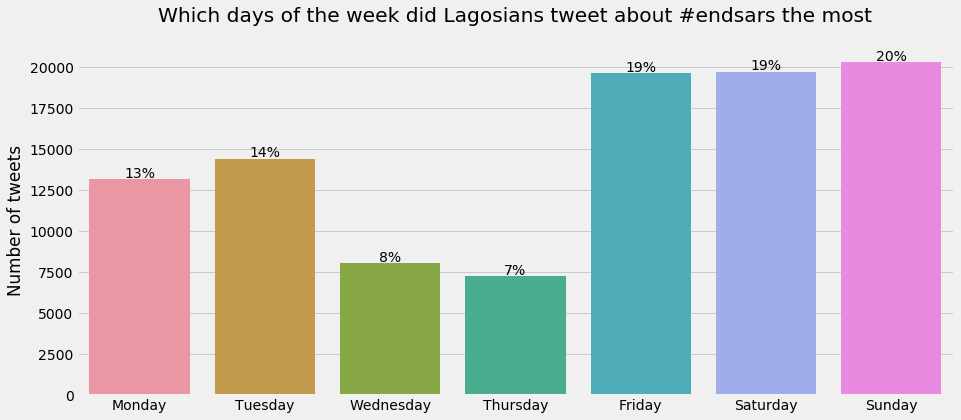

In [ ]:
# ditribution of tweet per day of the week
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 6))

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
days = sns.countplot(x="dayOfweek", data=tweet_data, order = day_order)
days.set_title("Which days of the week did Lagosians tweet about #endsars the most", 
                                             y=1.05)

def add_labels(ax, space):
    for rect in ax.patches:
        width = rect.get_width()
        height = rect.get_height()
        total = tweet_data.shape[0]
        
        ax.text(rect.get_x() + width/2,
               height + space,
               '{}%'.format(int(np.round(height/total*100))),
                ha="center")

        
def axis_labels(ax):
    ax.set_ylabel("Number of tweets")
    ax.set_xlabel("")

add_labels(days, 100)
axis_labels(days)
plt.show()

    - Almost 60% of the October #endsars tweets were made on either a Friday or during the weekend.

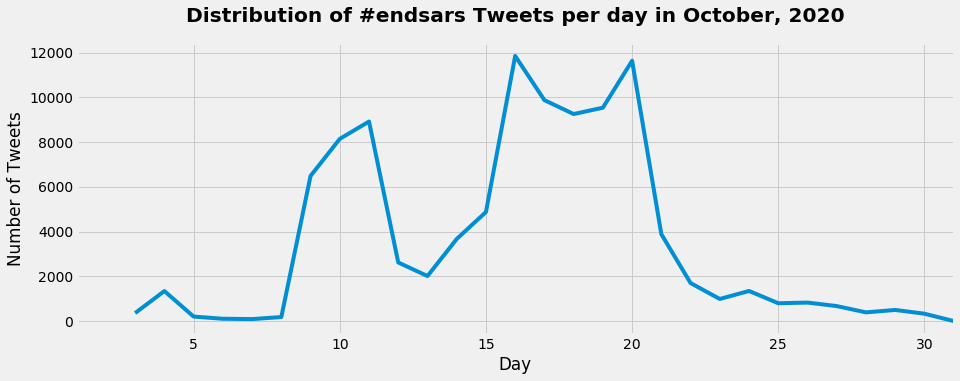

In [ ]:
# Distribution of #endsars Tweets per day in October, 2020
tweets_per_day = tweet_data.groupby('day').agg(np.size)['tweet']
tweets_per_day_plot = tweets_per_day.plot(figsize=(14, 5))
tweets_per_day_plot.set_ylabel('Number of Tweets')
tweets_per_day_plot.set_xlabel('Day')
tweets_per_day_plot.set_title('Distribution of #endsars Tweets per day in October, 2020', y=1.05, weight='bold')
tweets_per_day_plot.set_xlim(1,31)

plt.show()

- We observe the number of tweets peaked on October 11th, 16th and 20th - some of the most important during the protest
- According to [this Aljazeera timeline of the #endsar protest](https://www.aljazeera.com/news/2020/10/22/timeline-on-nigeria-unrest), it was on **October 11th** the Nigerian Police finally announced the dissolution of SARs after about a week of nation-wide demonstration. This annoucement didn't put an end to the protest, instead things got more intense when the Nigerian army released a "warning" statement, on **October 15th**. The statement only angered more people and got them tweeting more, as the protest continued. Then came `LEKKI MASSCACRE` on the night of **October 20th** and the President speech soon after. The two-days-long nationwide protest gradually stopped after this Lekki toll gate shooting causing people to tweet less about the protest.

#### Common Hashtags Used

In [ ]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image

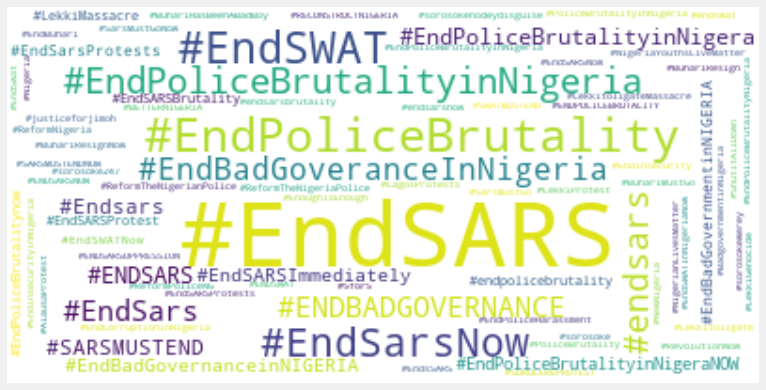

In [ ]:
def create_wordCloud(pattern):
    """create word cloud visualization
    
    arguments:
        pattern (str): regex pattern to extract certain text from the data
    """
    data = tweet_data["tweet"].str.extractall(pattern)[0].value_counts()

    data.index = data.index.map(str)                                                       # convert data index to string
    data_wc = WordCloud(background_color='white').generate_from_frequencies(data)          # generate word cloud

    # display the cloud
    fig = plt.figure()
    fig.set_figwidth(12) # set width
    fig.set_figheight(12) # set height

    plt.imshow(data_wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
# create word cloud of the most frequently used hashtags
hashtag = r"(#\w+)"
create_wordCloud(hashtag)

#### Most Mentioned Handles

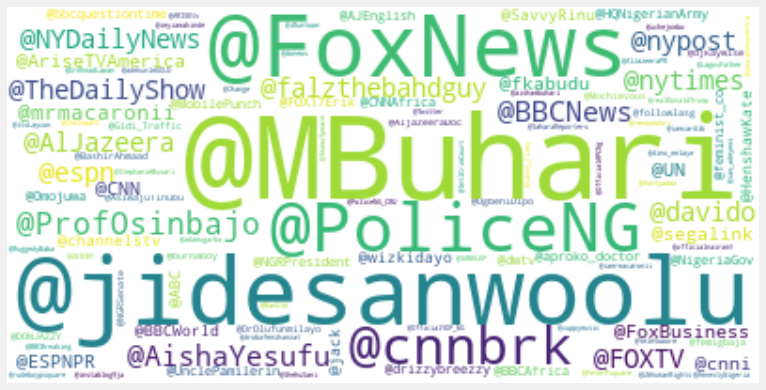

In [ ]:
# create word cloud of most frequent mentions
mentions = r"(@\w+)"
create_wordCloud(mentions)

## Text Preprocessing
Next step is to clean and prepare our tweet data for modeling. So,we proceed to:
- Remove all hastages, links and numbers
- Remove Stopwords (common words like "the", "a" etc)
- Tokenize and Vectorize words, i.e, convert tweet words to numbers

But first, we combine the training and test dataframes, then keep just the features relevant to our model building - `OriginalTweet` and `Sentiment`

In [ ]:
# make a copy of our tweet data
tweet_data_copy = tweet_data.copy()

# select relevant features: tweet and Sentiments
tweet_data = tweet_data.loc[:, ["tweet"]]

# load stop words
stop_word = stopwords.words('english')

def clean_tweet(text):
    text = re.sub(r"#\w+", " ", text)            # remove hashtags
    text = re.sub(r"@\w+", " ",text)             # remove mentions
    text = re.sub(r"http\S+", " ", text)         # remove urls
    text = re.sub(r"[^a-zA-Z]", " ", text)        # remove non-words (digits, punctuations etc)
    text = text.lower().strip()                  # convert tweet to lowercase and strip
    
    text = " ".join([word for word in text.split() if not word in stop_word])           # remove stop words    
    
    text = " ".join(nltk.word_tokenize(text))           # tokenize text
      
    return text

# clean OriginalTweet and assign the data to an new "tweet" column
tweet_data['tweet'] = tweet_data['tweet'].apply(lambda x: clean_tweet(x))

# remove rows with empty tweets
tweet_data.drop(tweet_data[tweet_data.tweet == ''].index, inplace =True)

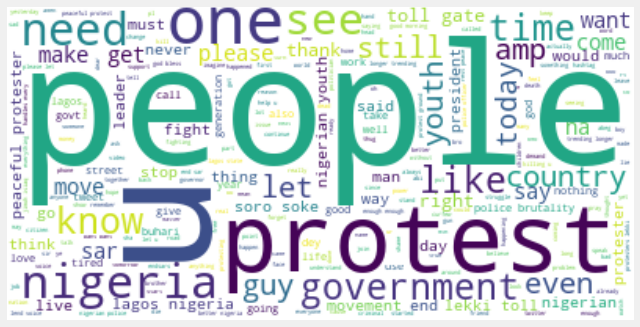

In [ ]:
# most common words in our tweet data
corpus = ",".join(word for word in tweet_data.tweet)
tweet_wc = WordCloud(max_words = 500, background_color='white', stopwords=stop_word).generate(corpus)   

# display the cloud
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

plt.imshow(tweet_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Sentiment Analysis Using Textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def getTextSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getTextPolarity(text):
    return TextBlob(text).sentiment.polarity

def getTextAnalysis(x):
    return 'negative' if x < 0 else 'positive' if x > 0 else 'neutral'

tweet_data['subjectivity'] = tweet_data.tweet.apply(getTextSubjectivity)
tweet_data['polarity'] = tweet_data.tweet.apply(getTextPolarity)
tweet_data['sentiment'] = tweet_data.polarity.apply(getTextAnalysis)

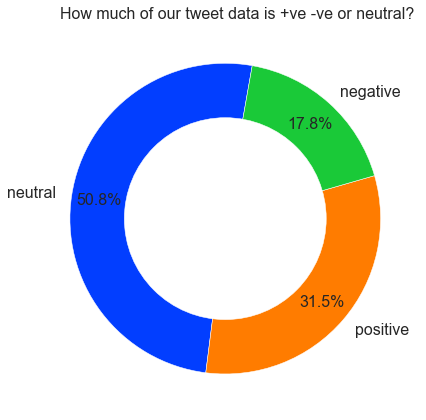

In [ ]:
# plot of tweet sentiment distribution
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))

sentiments = tweet_data.sentiment.value_counts()

sns.set_palette("bright")
plt.pie(sentiments,
        labels= sentiments.index,
        autopct='%1.1f%%', startangle=80, 
        pctdistance=0.82, textprops={"fontsize": 16})

centreCircle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centreCircle)

plt.tight_layout()
plt.title("How much of our tweet data is +ve -ve or neutral?", x=0.53, fontsize= 16)

plt.show()

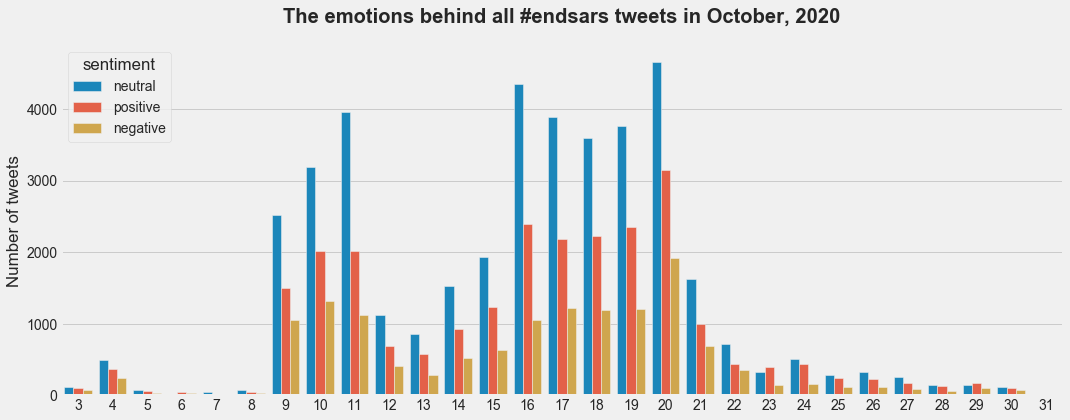

In [ ]:
tweet_data_copy['sentiment'] = tweet_data.sentiment

# distribution of tweets sentiment in October
plt.style.use("fivethirtyeight")

plt.figure(figsize=(16, 6))
location = sns.countplot(x= 'day', data= tweet_data_copy, hue='sentiment')
location.set_title("The emotions behind all #endsars tweets in October, 2020", y=1.05, fontweight='bold')

def axis_labels(ax):
    ax.set_ylabel("Number of tweets")
    ax.set_xlabel("")

axis_labels(location)

plt.show()

    - For most part of the most the emotions remained largely neutral then positive*

## Conclusion

Intuitively, we expect a good number of the tweets to have negative sentiments, due to the mood of the movement. However, our analysis says other wise.

Areas further improvements could be made include:
1. Using the facebook Fastext library to train our model, we could obtain a more accurate result with it